# Statistics `describe()` Method Explained

The `describe()` method provides a quick statistical summary of data. It's available in multiple libraries:

1. **`pandas.DataFrame.describe()`** / **`pandas.Series.describe()`** - For DataFrames and Series
2. **`scipy.stats.describe()`** - For arrays and lists

## What Does `describe()` Return?

Both methods provide summary statistics including:
- **Count**: Number of observations
- **Mean**: Average value
- **Standard Deviation**: Measure of spread
- **Min/Max**: Minimum and maximum values
- **Percentiles**: 25th, 50th (median), 75th percentiles (pandas) or skewness/kurtosis (scipy)

### Key Differences:

| Feature | pandas.describe() | scipy.stats.describe() |
|---------|-------------------|------------------------|
| Output | DataFrame/Series | Named tuple (DescribeResult) |
| Percentiles | ✅ 25%, 50%, 75% | ❌ No percentiles |
| Skewness | ❌ Not included | ✅ Included |
| Kurtosis | ❌ Not included | ✅ Included |
| Use Case | Quick EDA overview | Detailed statistical summary |


In [1]:
# Imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✓ All imports successful!")


✓ All imports successful!


## Example 1: Basic Usage with pandas.Series.describe()


pandas.Series.describe() output:
count    1000.000000
mean       50.193321
std         9.792159
min        17.587327
25%        43.524097
50%        50.253006
75%        56.479439
max        88.527315
Name: Normal Distribution, dtype: float64


Interpretation:
  • Count: 1000 observations
  • Mean: 50.19 (center of distribution)
  • Std: 9.79 (spread)
  • Min: 17.59, Max: 88.53
  • 25th percentile: 43.52
  • Median (50th): 50.25
  • 75th percentile: 56.48


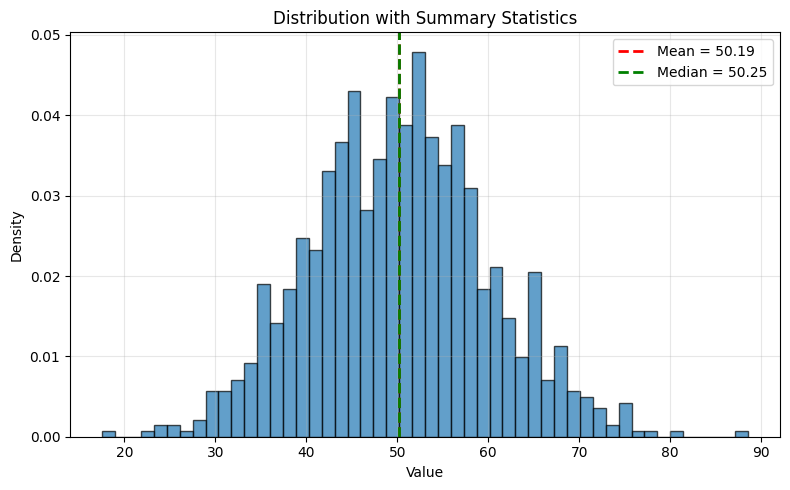

In [2]:
# Create a simple dataset
data = np.random.normal(loc=50, scale=10, size=1000)
series = pd.Series(data, name="Normal Distribution")

# Use describe()
summary = series.describe()
print("pandas.Series.describe() output:")
print("=" * 50)
print(summary)
print("\n" + "=" * 50)
print("\nInterpretation:")
print(f"  • Count: {summary['count']:.0f} observations")
print(f"  • Mean: {summary['mean']:.2f} (center of distribution)")
print(f"  • Std: {summary['std']:.2f} (spread)")
print(f"  • Min: {summary['min']:.2f}, Max: {summary['max']:.2f}")
print(f"  • 25th percentile: {summary['25%']:.2f}")
print(f"  • Median (50th): {summary['50%']:.2f}")
print(f"  • 75th percentile: {summary['75%']:.2f}")

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(series, bins=50, density=True, alpha=0.7, edgecolor='black')
ax.axvline(summary['mean'], color='r', linestyle='--', linewidth=2, label=f"Mean = {summary['mean']:.2f}")
ax.axvline(summary['50%'], color='g', linestyle='--', linewidth=2, label=f"Median = {summary['50%']:.2f}")
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Distribution with Summary Statistics')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Example 2: pandas.DataFrame.describe() - Multiple Columns


pandas.DataFrame.describe() output:
            Normal  Exponential      Uniform       Skewed
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.193321     5.039930    49.449499     4.082884
std       9.792159     5.014943    28.891967     2.874782
min      17.587327     0.016117     0.001163     0.051721
25%      43.524097     1.419773    25.652351     1.999062
50%      50.253006     3.629656    49.171060     3.469301
75%      56.479439     6.858421    73.862888     5.441533
max      88.527315    37.208615    99.782086    27.220465


Accessing specific statistics:
Mean of 'Normal' column: 50.19
Std of 'Exponential' column: 5.01
Median of 'Uniform' column: 49.17


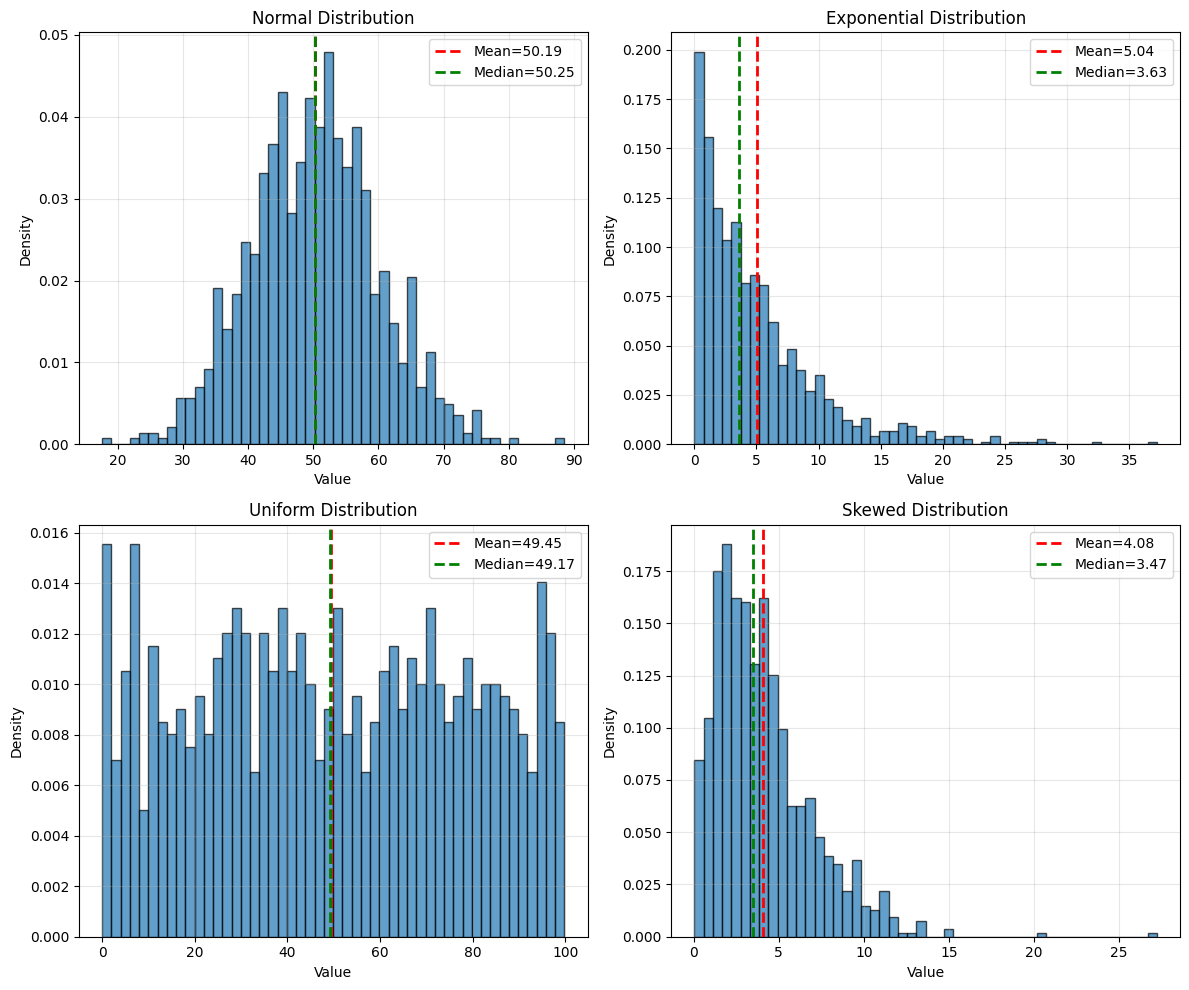

In [3]:
# Create a DataFrame with multiple columns
np.random.seed(42)
df = pd.DataFrame({
    'Normal': np.random.normal(50, 10, 1000),
    'Exponential': np.random.exponential(scale=5, size=1000),
    'Uniform': np.random.uniform(0, 100, 1000),
    'Skewed': np.random.gamma(2, 2, 1000)  # Right-skewed
})

# Describe all columns
summary = df.describe()
print("pandas.DataFrame.describe() output:")
print("=" * 70)
print(summary)
print("\n" + "=" * 70)

# Access specific statistics
print("\nAccessing specific statistics:")
print(f"Mean of 'Normal' column: {summary.loc['mean', 'Normal']:.2f}")
print(f"Std of 'Exponential' column: {summary.loc['std', 'Exponential']:.2f}")
print(f"Median of 'Uniform' column: {summary.loc['50%', 'Uniform']:.2f}")

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=50, density=True, alpha=0.7, edgecolor='black')
    mean_val = summary.loc['mean', col]
    median_val = summary.loc['50%', col]
    axes[idx].axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean={mean_val:.2f}')
    axes[idx].axvline(median_val, color='g', linestyle='--', linewidth=2, label=f'Median={median_val:.2f}')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Example 3: scipy.stats.describe() - More Detailed Statistics


In [4]:
# scipy.stats.describe() provides different statistics
data = np.random.normal(50, 10, 1000)

result = stats.describe(data)
print("scipy.stats.describe() output:")
print("=" * 50)
print(f"Number of observations (nobs): {result.nobs}")
print(f"Min and Max: {result.minmax}")
print(f"Mean: {result.mean:.2f}")
print(f"Variance: {result.variance:.2f}")
print(f"Standard deviation: {np.sqrt(result.variance):.2f}")
print(f"Skewness: {result.skewness:.4f}")
print(f"Kurtosis (excess): {result.kurtosis:.4f}")
print("\n" + "=" * 50)

print("\nInterpretation:")
print(f"  • Skewness: {result.skewness:.4f} (0 = symmetric, >0 = right-skewed, <0 = left-skewed)")
print(f"  • Kurtosis (excess): {result.kurtosis:.4f} (0 = normal, >0 = heavy tails, <0 = light tails)")

# Compare with pandas
pandas_summary = pd.Series(data).describe()
print(f"\nComparison:")
print(f"  pandas mean: {pandas_summary['mean']:.2f} vs scipy mean: {result.mean:.2f}")
print(f"  pandas std: {pandas_summary['std']:.2f} vs scipy std: {np.sqrt(result.variance):.2f}")


scipy.stats.describe() output:
Number of observations (nobs): 1000
Min and Max: (np.float64(18.232961868039993), np.float64(81.1291020104384))
Mean: 49.84
Variance: 96.12
Standard deviation: 9.80
Skewness: 0.0082
Kurtosis (excess): 0.1507


Interpretation:
  • Skewness: 0.0082 (0 = symmetric, >0 = right-skewed, <0 = left-skewed)
  • Kurtosis (excess): 0.1507 (0 = normal, >0 = heavy tails, <0 = light tails)

Comparison:
  pandas mean: 49.84 vs scipy mean: 49.84
  pandas std: 9.80 vs scipy std: 9.80


## Example 4: Handling Missing Values


In [5]:
# Create data with missing values
data_with_nan = pd.Series([1, 2, 3, 4, 5, np.nan, 7, 8, 9, 10, np.nan, 12, 13, 14, 15])

print("Data with missing values:")
print(data_with_nan)
print(f"\nTotal values: {len(data_with_nan)}")
print(f"Non-null values: {data_with_nan.notna().sum()}")
print(f"Null values: {data_with_nan.isna().sum()}")

# pandas.describe() automatically handles NaN values
summary = data_with_nan.describe()
print("\n" + "=" * 50)
print("pandas.describe() output (NaN values excluded):")
print("=" * 50)
print(summary)
print(f"\n✓ Notice: count = {summary['count']:.0f} (only non-null values)")

# scipy.stats.describe() also handles NaN
scipy_result = stats.describe(data_with_nan.dropna())
print(f"\n✓ scipy.stats.describe() (after dropna): nobs = {scipy_result.nobs}")


Data with missing values:
0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      NaN
6      7.0
7      8.0
8      9.0
9     10.0
10     NaN
11    12.0
12    13.0
13    14.0
14    15.0
dtype: float64

Total values: 15
Non-null values: 13
Null values: 2

pandas.describe() output (NaN values excluded):
count    13.000000
mean      7.923077
std       4.716311
min       1.000000
25%       4.000000
50%       8.000000
75%      12.000000
max      15.000000
dtype: float64

✓ Notice: count = 13 (only non-null values)

✓ scipy.stats.describe() (after dropna): nobs = 13


## Example 5: Custom Percentiles with pandas.describe()


In [6]:
# You can specify custom percentiles
data = np.random.normal(50, 10, 1000)
series = pd.Series(data)

# Default percentiles
print("Default percentiles [0.25, 0.5, 0.75]:")
print(series.describe())

# Custom percentiles
print("\n" + "=" * 50)
print("Custom percentiles [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:")
print(series.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Only specific percentiles
print("\n" + "=" * 50)
print("Only median:")
print(series.describe(percentiles=[0.5]))

# No percentiles
print("\n" + "=" * 50)
print("No percentiles:")
print(series.describe(percentiles=[]))


Default percentiles [0.25, 0.5, 0.75]:
count    1000.000000
mean       49.714835
std        10.166061
min        21.004861
25%        43.246141
50%        49.548114
75%        56.723174
max        80.982994
dtype: float64

Custom percentiles [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
count    1000.000000
mean       49.714835
std        10.166061
min        21.004861
10%        36.498288
25%        43.246141
50%        49.548114
75%        56.723174
90%        62.799237
95%        66.541403
99%        73.890099
max        80.982994
dtype: float64

Only median:
count    1000.000000
mean       49.714835
std        10.166061
min        21.004861
50%        49.548114
max        80.982994
dtype: float64

No percentiles:
count    1000.000000
mean       49.714835
std        10.166061
min        21.004861
50%        49.548114
max        80.982994
dtype: float64


## Example 6: Categorical vs Numeric Data


In [7]:
# Create DataFrame with mixed types
df_mixed = pd.DataFrame({
    'Numeric': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A'],
    'Text': ['apple', 'banana', 'apple', 'cherry', 'banana', 'apple', 'cherry', 'cherry', 'banana', 'apple']
})

# Convert to categorical
df_mixed['Category'] = df_mixed['Category'].astype('category')

print("DataFrame with mixed types:")
print(df_mixed)
print("\n" + "=" * 50)

# Describe numeric columns only (default)
print("describe() - numeric columns only (default):")
print(df_mixed.describe())

# Include all columns
print("\n" + "=" * 50)
print("describe(include='all') - all column types:")
print(df_mixed.describe(include='all'))

# Only categorical
print("\n" + "=" * 50)
print("describe(include=['category']) - only categorical:")
print(df_mixed.describe(include=['category']))


DataFrame with mixed types:
   Numeric Category    Text
0        1        A   apple
1        2        B  banana
2        3        A   apple
3        4        C  cherry
4        5        B  banana
5        6        A   apple
6        7        C  cherry
7        8        C  cherry
8        9        B  banana
9       10        A   apple

describe() - numeric columns only (default):
        Numeric
count  10.00000
mean    5.50000
std     3.02765
min     1.00000
25%     3.25000
50%     5.50000
75%     7.75000
max    10.00000

describe(include='all') - all column types:
         Numeric Category   Text
count   10.00000       10     10
unique       NaN        3      3
top          NaN        A  apple
freq         NaN        4      4
mean     5.50000      NaN    NaN
std      3.02765      NaN    NaN
min      1.00000      NaN    NaN
25%      3.25000      NaN    NaN
50%      5.50000      NaN    NaN
75%      7.75000      NaN    NaN
max     10.00000      NaN    NaN

describe(include=['category']) -

## Example 7: Real Weather Data - Using describe() (Optional)


In [8]:
# Try to load weather data (optional)
try:
    import dask.dataframe as dd
    
    DATA_PATH = '../../../weather_data/stations_weather_with_dist2coast_optimized.parquet'
    weather_data = dd.read_parquet(DATA_PATH)
    
    # Get TAVG data
    tavg_data = weather_data[weather_data['ELEMENT'] == 'TAVG']
    
    # Find day columns
    day_cols = [col for col in tavg_data.columns if col.startswith('day_') and col[4:].isdigit()]
    
    if len(day_cols) > 0:
        # Sample for efficiency
        tavg_sample = tavg_data[day_cols].sample(frac=0.1, random_state=42).compute()
        
        # Flatten to single series
        tavg_values = tavg_sample.values.flatten()
        tavg_values = pd.Series(tavg_values[~np.isnan(tavg_values)], name="TAVG")
        
        print(f"✓ Loaded {len(tavg_values):,} TAVG values")
        
        # Use describe()
        summary = tavg_values.describe()
        print("\n" + "=" * 50)
        print("TAVG Temperature Statistics:")
        print("=" * 50)
        print(summary)
        
        # Also use scipy.stats.describe()
        scipy_summary = stats.describe(tavg_values.values)
        print("\n" + "=" * 50)
        print("scipy.stats.describe() - Additional Statistics:")
        print("=" * 50)
        print(f"Skewness: {scipy_summary.skewness:.4f}")
        print(f"Kurtosis: {scipy_summary.kurtosis:.4f}")
        
        use_real_data = True
    else:
        raise ValueError("No day columns found")
        
except (FileNotFoundError, ImportError, ValueError, KeyError, AttributeError) as e:
    print(f"⚠ Weather data not available ({type(e).__name__}). Using synthetic temperature data.")
    # Synthetic temperature data
    tavg_values = pd.Series(np.random.normal(15, 10, 1000), name="TAVG (synthetic)")
    summary = tavg_values.describe()
    print("\n" + "=" * 50)
    print("Synthetic Temperature Statistics:")
    print("=" * 50)
    print(summary)
    use_real_data = False


✓ Loaded 9,213,225 TAVG values

TAVG Temperature Statistics:
count    9.213225e+06
mean     9.997884e+01
std      1.424164e+02
min     -9.990000e+02
25%      1.300000e+01
50%      1.170000e+02
75%      2.080000e+02
max      2.303600e+04
Name: TAVG, dtype: float64



scipy.stats.describe() - Additional Statistics:
Skewness: 0.6364
Kurtosis: 220.5560


## Summary

### pandas.describe() Features:

✅ Quick overview of data distribution
✅ Includes count, mean, std, min, max, percentiles (25%, 50%, 75%)
✅ Automatically handles NaN values
✅ Works with DataFrames and Series
✅ Can specify custom percentiles
✅ Can include/exclude different data types

### scipy.stats.describe() Features:

✅ More detailed statistical summary
✅ Includes skewness and kurtosis
✅ Returns a named tuple for easy access
✅ Works with arrays and lists
✅ No percentiles (but includes min/max)

### When to Use Which:

| Use Case | Method |
|----------|--------|
| Quick EDA overview | `pandas.describe()` |
| Need percentiles | `pandas.describe()` |
| Need skewness/kurtosis | `scipy.stats.describe()` |
| Working with DataFrames | `pandas.describe()` |
| Working with arrays | Either, but `scipy.stats.describe()` is more natural |
| Detailed statistical analysis | Both! |

### Common Usage Patterns:

```python
# Basic usage
df.describe()

# Custom percentiles
df.describe(percentiles=[0.1, 0.5, 0.9])

# Include all data types
df.describe(include='all')

# Access specific statistics
summary = df.describe()
mean_value = summary.loc['mean', 'column_name']
```
